# TotalMarketValue Analysis

## Dataset Description:
The objective of this report is to perform an exploratory analysis of the “Total Market Value” variable in the context of Colombian soccer. Through the use of different graphical and statistical techniques, we seek to understand the factors that influence the market value of players, explore the distributions of the related variables, and detect possible anomalies or outliers that could be affecting the data. This analysis will serve as a basis for further research, such as the identification of players with growth potential or the prediction of the market value of Colombian soccer teams, which is the main objective of this project.

## Data Dictionary:

- `Total Market Value`: Variable to be predicted, it is the market value of the team in dollars.

- `Club`: The name of the football team.

- `Squad`: Total amoun of players registered in the team. It is important to evaluate the size of the team and the relation with the total market value. 

- `Foreigners`: Number of foreigners players on the team. It allows us to examine the team diversity and its dependency on international talent. 

- `titles obtained`: Amount of titles by the teams both, national and internaionally. 

- `Market value` : The average unique market value of each player can be influenced by many factors such as age, recent performance, and demand in the transfer market. 

- `Average attendance` : Number of attendees at each team's stadiums, which can give an estimate of the amount of money coming in from attendance. 

In [ ]:
# REPRESENTACIÓN, NORMALIZACIÓN Y LIMPIEZA DE DATOS 

import pandas as pd


# Función para limpiar y convertir valores de mercado
def clean_market_value(column):
    # Eliminar el símbolo € si existe
    column_cleaned = column.str.replace('€', '', regex=False)
    
    # Convertir millones ('m') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('m', '')) * 1_000_000 if isinstance(x, str) and 'm' in x else x)
    
    # Convertir miles ('k') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('k', '')) * 1_000 if isinstance(x, str) and 'k' in x else x)
    
    # Convertir finalmente a numérico
    return pd.to_numeric(column_cleaned, errors='coerce')

# Leer todas las hojas del archivo Excel en un diccionario de DataFrames
sheets_dict = pd.read_excel(r'C:\Users\User\Downloads\BD_TotalMarketValue.xlsx', sheet_name=None, header=1)

# Crear un nuevo diccionario para almacenar las hojas modificadas
cleaned_sheets_dict = {}

# Iterar sobre cada hoja y realizar las operaciones necesarias
for sheet_name, df in sheets_dict.items():
    
    # Normalizar el nombre de las columnas
    df = df.rename(columns=lambda x: x.strip().lower())  # Elimina espacios en blanco y convierte a minúsculas

    # Eliminar la columna "unnamed: 0" si existe
    if 'unnamed: 0' in df.columns:
        df = df.drop(columns=['unnamed: 0'])

    # Limpiar las columnas 'total market value' y 'market value'
    if 'total market value' in df.columns:
        df['total market value'] = clean_market_value(df['total market value'])
    if 'market value' in df.columns:
        df['market value'] = clean_market_value(df['market value'])

    # Método fillna para imputar los valores NaN
    df.fillna({'total market value': df['total market value'].median(), 'market value': df['market value'].median()}, inplace=True)

    # Guardar el DataFrame modificado en el nuevo diccionario
    cleaned_sheets_dict[sheet_name] = df
    
    print(f"Hoja procesada: {sheet_name}")
    print(df)  
    df.isna().sum() 
    df.shape
    df.info()  
    

    


          mean    median       std      min      max  count
year                                                       
2009  0.002441  0.002100  0.001949  0.00005  0.00638     18
2010  0.002852  0.002430  0.002309  0.00030  0.00830     18
2011  0.002763  0.002375  0.002149  0.00020  0.00740     18
2012  0.009842  0.007880  0.004500  0.00245  0.01800     18
2013  0.009748  0.008455  0.004658  0.00293  0.01903     18
2014  0.011919  0.010100  0.005021  0.00423  0.02065     18
2015  0.010251  0.009665  0.005239  0.00370  0.02390     20
2016  0.009132  0.009015  0.005412  0.00235  0.02410     20
2017  0.010272  0.009390  0.006279  0.00245  0.02563     20
2018  0.012679  0.012115  0.006073  0.00315  0.02335     20
2019  0.014238  0.013430  0.004686  0.00775  0.02490     20
2021  0.016355  0.015830  0.005432  0.00698  0.02670     20
2022  0.013123  0.012525  0.006040  0.00458  0.03048     20
2023  0.013698  0.011725  0.007074  0.00540  0.03355     20
2024  0.012169  0.010865  0.005450  0.00

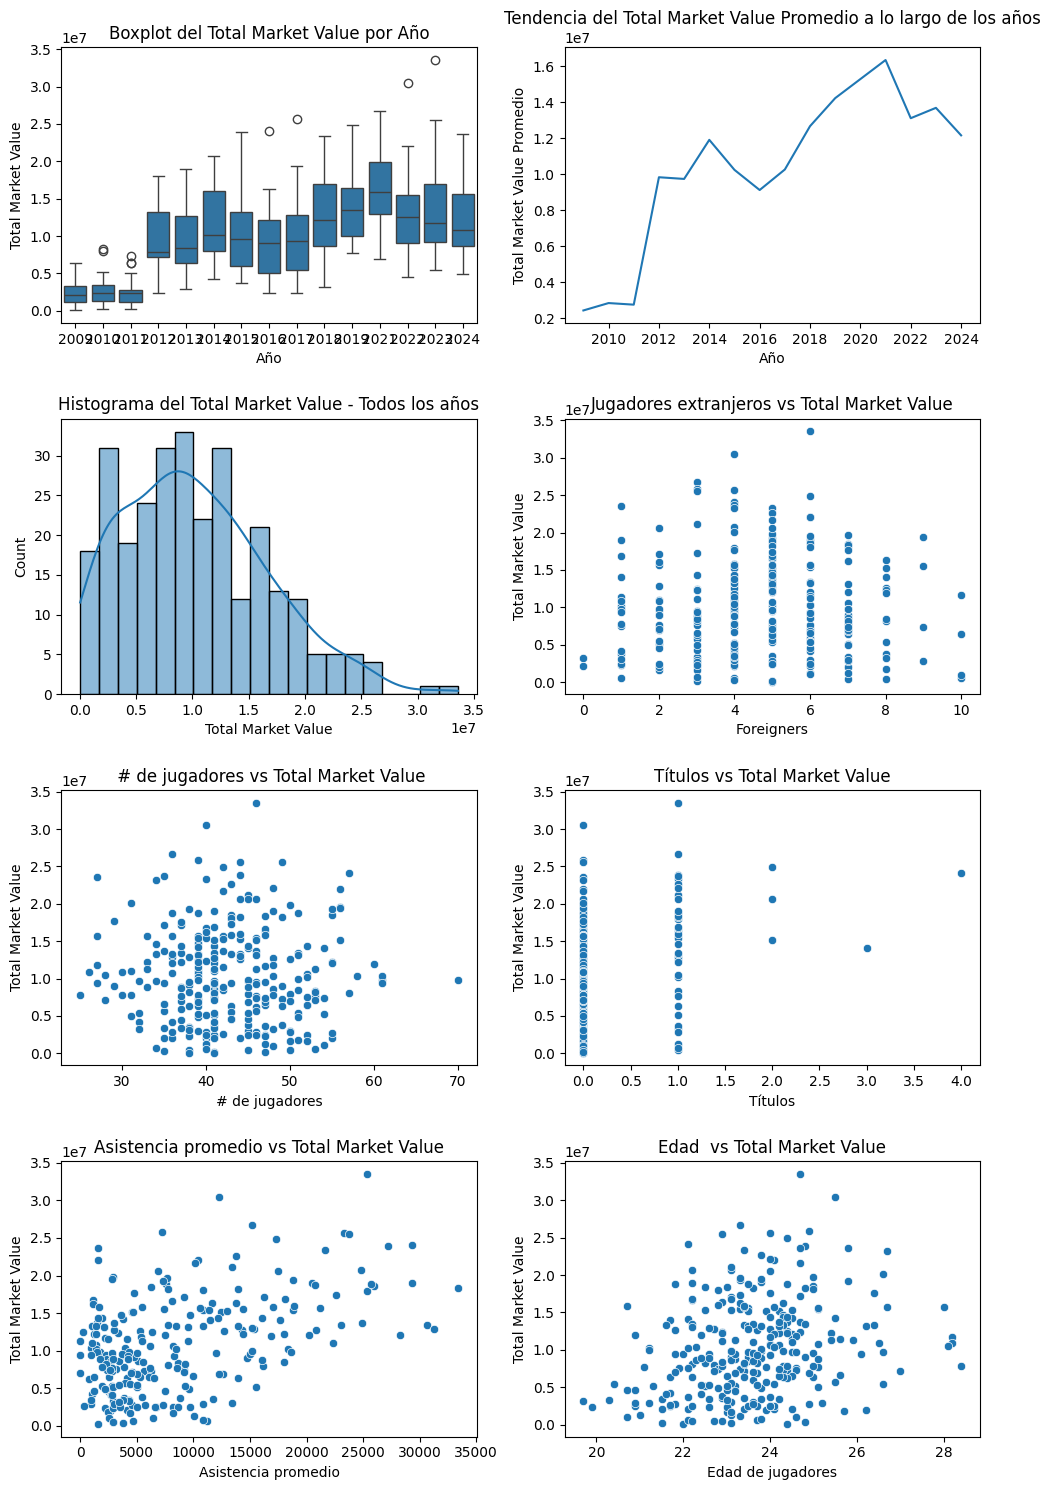

In [3]:
# ANÁLISIS EXPLORATORIO DE DATOS EDA GLOBAL 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


# Crear una lista vacía para almacenar los DataFrames
combined_data = []

# Recorrer las hojas y añadir una columna de 'año'
for sheet_name, df in cleaned_sheets_dict.items():
    # Extraer el año del nombre de la hoja
    year = sheet_name.split('_')[-1]
    
    # Añadir la columna 'year' al DataFrame
    df['year'] = int(year)
    
    # Añadir el DataFrame a la lista
    combined_data.append(df)

# Combinar todos los DataFrames en uno solo
df_combined = pd.concat(combined_data, ignore_index=True)

# Estadísticas por año
df_stats = df_combined.groupby('year')['total market value'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
df_stats[['mean', 'median', 'std', 'min', 'max']] = df_stats[['mean', 'median',  'std', 'min', 'max' ]] / 1000_000_000
print(df_stats)


# Cálculo de la asimetría de Fisher (Skewness) para los datos completos
fisher_skewness_global = skew(df_combined['total market value'])
print(f"Asimetría de Fisher (Skewness) Global: {fisher_skewness_global}")


# Agrupar por año para calcular el promedio del total market value
df_grouped = df_combined.groupby('year')['total market value'].mean().reset_index()

# Crear una figura con cuatro subplots con los análisis generales (2 filas y 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Subplot 1: Boxplot del total market value por año
sns.boxplot(x='year', y='total market value', data=df_combined, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot del Total Market Value por Año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Total Market Value')

# Subplot 2: Line plot de la tendencia global del total market value
sns.lineplot(x='year', y='total market value', data=df_grouped, ax=axes[0, 1])
axes[0, 1].set_title('Tendencia del Total Market Value Promedio a lo largo de los años') 
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Total Market Value Promedio') 

# Subplot 3: Histograma con KDE
sns.histplot(df_combined['total market value'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histograma del Total Market Value - Todos los años')
axes[1, 0].set_xlabel('Total Market Value')




# BUSCAMOS RELACIONES ENTRE LAS VARIABLES PREDICTORAS Y EL 'total market value' 


# Subplot 4 Gráfico de dispersión entre Foreigners y total market value
sns.scatterplot(x='foreigners', y='total market value', data=df_combined, ax=axes[1, 1])
axes[1, 1].set_title('Jugadores extranjeros vs Total Market Value')
axes[1, 1].set_xlabel('Foreigners')
axes[1, 1].set_ylabel('Total Market Value')


# Subplot 5 Gráfico de dispersión entre Squad (número de jugadores) y total market value
sns.scatterplot(x='squad', y='total market value', data=df_combined, ax=axes[2, 0])
axes[2, 0].set_title(' # de jugadores vs Total Market Value')
axes[2, 0].set_xlabel('# de jugadores')
axes[2, 0].set_ylabel('Total Market Value')


# Subplot 6 Gráfico de dispersión entre cantidad de títulos y total market value 
sns.scatterplot(x='titulos', y='total market value', data=df_combined, ax=axes[2, 1])
axes[2, 1].set_title('Títulos vs Total Market Value')
axes[2, 1].set_xlabel('Títulos')
axes[2, 1].set_ylabel('Total Market Value')


#Subplot # 7 Gráfico de dispersión entre asistencia promedio a los estadios y total market value 
sns.scatterplot(x='promedio asistencia', y='total market value', data=df_combined, ax=axes[3, 0])
axes[3, 0].set_title('Asistencia promedio vs Total Market Value')
axes[3, 0].set_xlabel('Asistencia promedio')
axes[3, 0].set_ylabel('Total Market Value')


# Subplot 8: Gráfico de dispersión entre edad promedio de jugadores y total market value
sns.scatterplot(x='age', y='total market value', data=df_combined, ax=axes[3, 1])
axes[3, 1].set_title('Edad  vs Total Market Value')
axes[3, 1].set_xlabel('Edad de jugadores')
axes[3, 1].set_ylabel('Total Market Value')



# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()








